In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [ ]:
#Mount Google Colab
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
#Import sectors data
healthCare= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLV.csv')
industrials= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLI.csv')
materials= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLB.csv')
realEstate= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLRE.csv')
technology= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLK.csv')
utilities= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLU.csv')
communication= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLC.csv')
conDiscretionary= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLY.csv')
conStaples= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLP.csv')
energy= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLE.csv')
financials= pd.read_csv('/content/MyDrive/My Drive/Colab Notebooks/ADSP/SectorsData/XLF.csv')

In [ ]:
healthCare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6378 non-null   object 
 1   Open       6378 non-null   float64
 2   High       6378 non-null   float64
 3   Low        6378 non-null   float64
 4   Close      6378 non-null   float64
 5   Adj Close  6378 non-null   float64
 6   Volume     6378 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 348.9+ KB


In [ ]:
#Check sample data from healthcare
healthCare.sample(n=5, random_state=1)

,Date,Open,High,Low,Close,Adj Close,Volume
4624,2017-05-10,75.470001,75.480003,75.059998,75.370003,67.018661,4314900
4741,2017-10-25,83.029999,83.230003,82.669998,82.989998,74.360085,6819100
4442,2016-08-18,74.379997,74.580002,74.190002,74.419998,65.393700,4180100
2054,2007-02-26,34.470001,34.560001,34.400002,34.529999,25.595348,1881500
1497,2004-12-07,29.450001,29.450001,28.870001,28.900000,20.796206,300200


In [ ]:
sectors_dfs=[healthCare, industrials, materials,realEstate, technology, utilities, communication, conDiscretionary, conStaples, energy, financials ]

In [ ]:
#Get the length of data of each sector
def displayLen (listSectors):
    for i in listSectors:
        print(i.shape[0])


In [ ]:
displayLen(sectors_dfs)

6378
6378
251
2153
6378
6379
1475
251
251
6378
251


In [ ]:
finalSectors_df=[healthCare, industrials, technology, utilities, energy]

In [ ]:
healthCare['Date']=pd.to_datetime(healthCare['Date'])
industrials['Date']=pd.to_datetime(industrials['Date'])
technology['Date']=pd.to_datetime(technology['Date'])
utilities['Date']=pd.to_datetime(utilities['Date'])
energy['Date']=pd.to_datetime(energy['Date'])

In [ ]:
industrials.info(), healthCare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6378 non-null   datetime64[ns]
 1   Open       6378 non-null   float64       
 2   High       6378 non-null   float64       
 3   Low        6378 non-null   float64       
 4   Close      6378 non-null   float64       
 5   Adj Close  6378 non-null   float64       
 6   Volume     6378 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 348.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6378 non-null   datetime64[ns]
 1   Open       6378 non-null   float64       
 2   High       6378 non-null   float64       
 3   Low        6378 non-null   float64       
 4   Close  

(None, None)

In [ ]:
#Rename each sector columns per the sector name
def renameColumns(data,colNames):
      for i in np.arange(0,len(data)):
         feature=data[i]
         new_feature =feature[['Date','Adj Close']]
         data[i]=new_feature.rename(columns={'Adj Close':colNames[i]})

      return data


In [ ]:
#Merge all the dataframes by date
def mergedDF(data):
      merged_df=data[0]
      for i in np.arange(1,len(data)):
         merged_df=merged_df.merge(data[i], how='inner', on='Date')
      return merged_df

In [ ]:
#List of sectors with the maximum length
mergedList=renameColumns(finalSectors_df,['Health','Indus','Tech','Util','Energy'])

In [ ]:
len(mergedList)

5

In [ ]:
merged_sectors=mergedDF(mergedList)

In [ ]:
merged_sectors.set_index('Date', inplace=True)

In [ ]:
merged_sectors

,Health,Indus,Tech,Util,Energy
Date,,,,,
1998-12-22,17.365145,14.844045,24.149883,12.363212,12.230893
1998-12-23,17.755371,15.103066,24.726839,12.311394,12.485535
1998-12-24,17.863775,15.302327,24.632645,12.538074,12.419821
1998-12-28,17.603622,15.382023,24.703297,12.473308,12.354110
1998-12-29,17.993849,15.601192,24.773941,12.680549,12.477324
...,...,...,...,...,...
2024-04-23,141.300003,123.070000,197.130005,66.339996,96.120003
2024-04-24,140.860001,122.089996,198.029999,66.739998,96.190002
2024-04-25,139.919998,122.459999,197.600006,66.919998,96.629997


<Axes: >

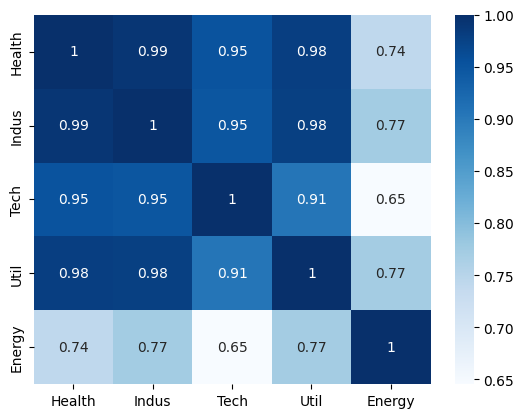

In [ ]:
#Correlation between sectors
sbs.heatmap(merged_sectors.corr(), annot=True, cmap='Blues')

In [ ]:
merged_sectors.index

DatetimeIndex(['1998-12-22', '1998-12-23', '1998-12-24', '1998-12-28',
               '1998-12-29', '1998-12-30', '1998-12-31', '1999-01-04',
               '1999-01-05', '1999-01-06',
               ...
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-29'],
              dtype='datetime64[ns]', name='Date', length=6378, freq=None)

<Axes: xlabel='Date', ylabel='Tech'>

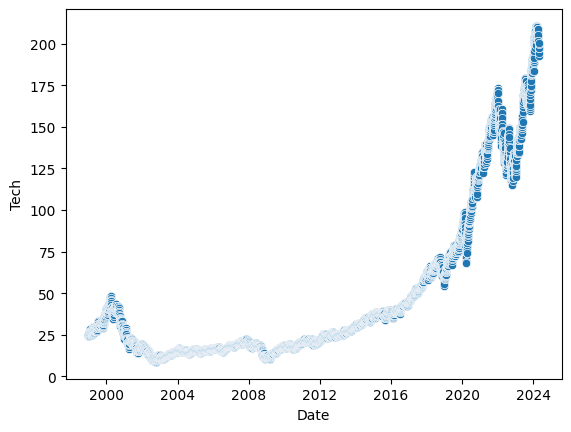

In [ ]:
sbs.scatterplot(x=merged_sectors.index, y=merged_sectors['Tech'])

<Axes: xlabel='Date', ylabel='Energy'>

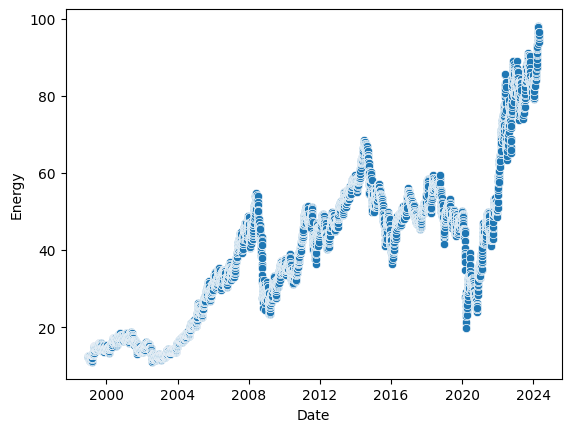

In [ ]:
sbs.scatterplot(x=merged_sectors.index, y=merged_sectors['Energy'])

Time Series Analysis on Sectors Data

In [ ]:
#Convert Sectors Values into returns
sectors_rets = merged_sectors.pct_change()

In [ ]:
sectors_rets.head()

,Health,Indus,Tech,Util,Energy
Date,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN
1998-12-23,0.022472,0.017449,0.023891,-0.004191,0.020820
1998-12-24,0.006105,0.013193,-0.003809,0.018412,-0.005263
1998-12-28,-0.014563,0.005208,0.002868,-0.005166,-0.005291
1998-12-29,0.022167,0.014248,0.002860,0.016615,0.009974


In [ ]:
sectors_rets=sectors_rets.dropna()

In [ ]:
sectors_rets.head()

,Health,Indus,Tech,Util,Energy
Date,,,,,
1998-12-23,0.022472,0.017449,0.023891,-0.004191,0.020820
1998-12-24,0.006105,0.013193,-0.003809,0.018412,-0.005263
1998-12-28,-0.014563,0.005208,0.002868,-0.005166,-0.005291
1998-12-29,0.022167,0.014248,0.002860,0.016615,0.009974
1998-12-30,-0.008434,-0.004470,-0.003802,-0.008172,-0.015142


In [ ]:
#Import timeseries libraries
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
#Stationarity check on timeseries
def checkStationarity(data):
  ''' Function to check stationarity
      of the input time-seres'''

  adfTestResults = sm.tsa.adfuller(data)

  #Return p-value
  return adfTestResults[1]


In [ ]:
#Print p-value
for col in sectors_rets.columns:
    print(checkStationarity(sectors_rets[col]))

3.563719136104517e-30
8.3923326728631e-28
0.0
0.0
0.0


Since all the p-values less than 0, return time-series is stationary

In [ ]:
#Plot each sector return time-series
def plotTimeSeries(data):
  data.plot()


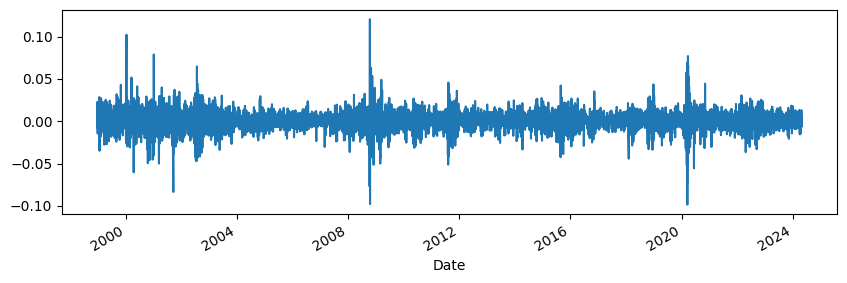

In [ ]:
plt.figure(figsize=(10,3))
sectors_rets['Health'].plot()
plt.show()

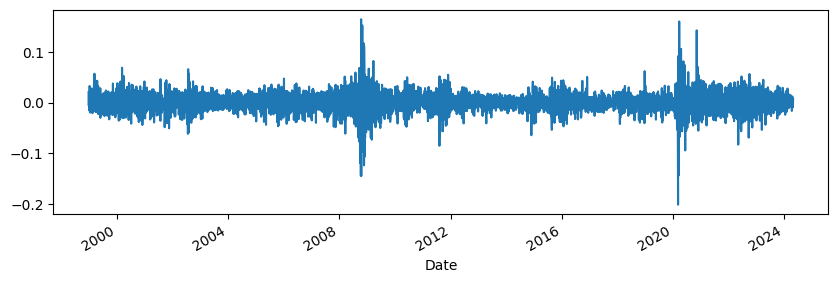

In [ ]:
plt.figure(figsize=(10,3))
sectors_rets['Energy'].plot()
plt.show()

In [ ]:
#Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#p=0
arimaModel = ARIMA(sectors_rets['Health'])
res=arimaModel.fit()
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Health   No. Observations:                 6377
Model:                          ARIMA   Log Likelihood               19502.381
Date:                Wed, 26 Jun 2024   AIC                         -39000.763
Time:                        01:06:39   BIC                         -38987.242
Sample:                             0   HQIC                        -38996.082
                               - 6377                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.720      0.007       0.000       0.001
sigma2         0.0001   9.79e-07    132.056      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   7.96   Jarque-

In [ ]:
#p=1
arimaModel = ARIMA(sectors_rets['Health'], order=[1,0,0])
res=arimaModel.fit()
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Health   No. Observations:                 6377
Model:                 ARIMA(1, 0, 0)   Log Likelihood               19506.366
Date:                Wed, 26 Jun 2024   AIC                         -39006.731
Time:                        01:06:41   BIC                         -38986.450
Sample:                             0   HQIC                        -38999.710
                               - 6377                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.810      0.005       0.000       0.001
ar.L1         -0.0353      0.007     -5.309      0.000      -0.048      -0.022
sigma2         0.0001   1.02e-06    126.627      0.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 3500x1000 with 0 Axes>

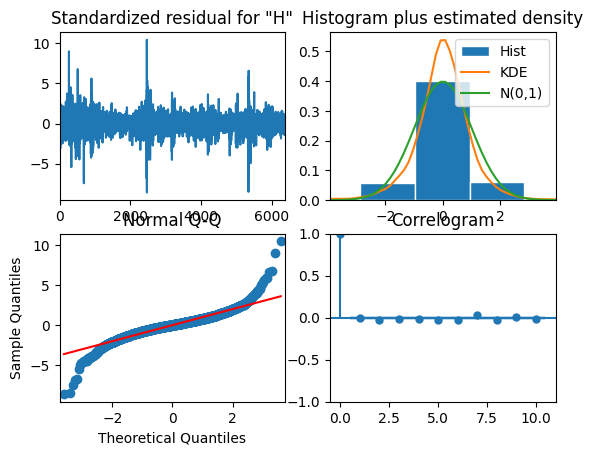

In [ ]:
plt.figure(figsize=(35,10))
res.plot_diagnostics()
plt.show()

In [ ]:
sectors_rets['Health'].shape[0]

6377

In [ ]:
dataN=np.arange(0, sectors_rets['Health'].shape[0])
type(dataN)

numpy.ndarray

In [ ]:
residuals=res.forecasts_error

In [ ]:
dataN.shape

(6377,)

In [ ]:
dataN=dataN.reshape(6377,)

In [ ]:
residuals=residuals.reshape(6377,)

In [ ]:
dataN.shape, residuals.shape

((6377,), (6377,))

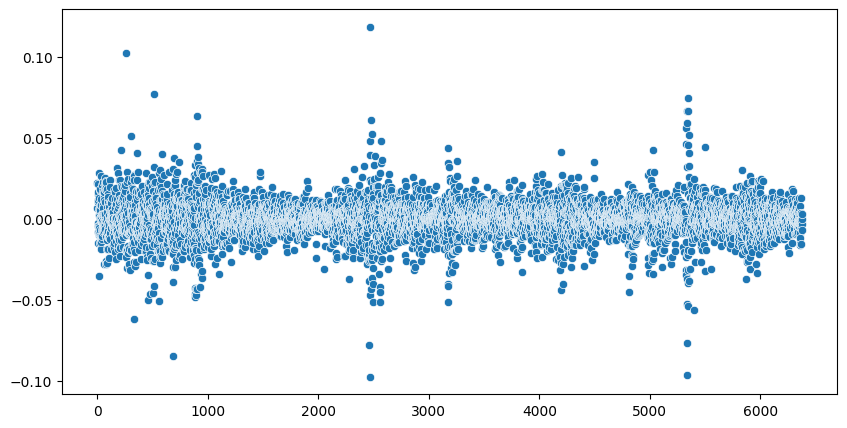

In [ ]:
plt.figure(figsize=(10,5))
sbs.scatterplot(y=residuals, x=dataN)
plt.show()

In [ ]:
#p=2
arimaModel = ARIMA(sectors_rets['Health'], order=[2,0,0])
res=arimaModel.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 Health   No. Observations:                 6377
Model:                 ARIMA(2, 0, 0)   Log Likelihood               19508.444
Date:                Wed, 26 Jun 2024   AIC                         -39008.888
Time:                        01:06:49   BIC                         -38981.846
Sample:                             0   HQIC                        -38999.526
                               - 6377                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.877      0.004       0.000       0.001
ar.L1         -0.0364      0.007     -5.485      0.000      -0.049      -0.023
ar.L2         -0.0255      0.005     -4.654      0.0

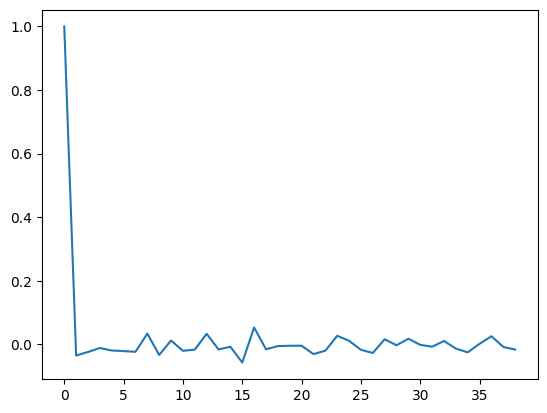

In [ ]:
plt.plot(sm.tsa.acf(sectors_rets['Health']))



In [ ]:
# Module to create ACF and PACF plots
from statsmodels.graphics import tsaplots

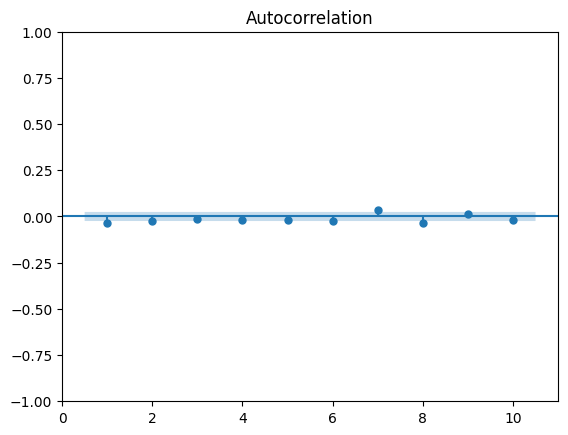

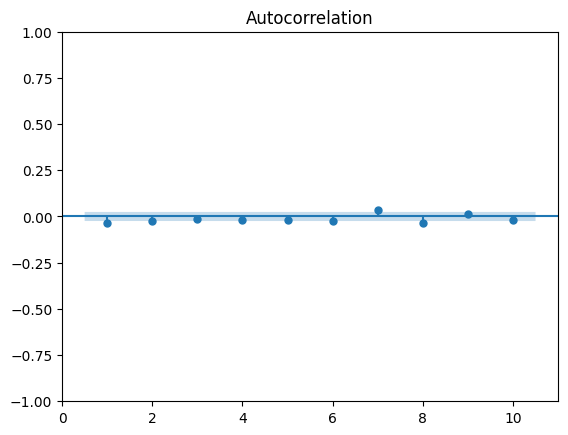

In [ ]:
tsaplots.plot_acf(sectors_rets['Health'], zero=False, lags=10)

In [ ]:
#p=10, q=5
arimaModel = ARIMA(sectors_rets['Health'], order=[10,0,0])
res=arimaModel.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 Health   No. Observations:                 6377
Model:                ARIMA(10, 0, 0)   Log Likelihood               19522.859
Date:                Wed, 26 Jun 2024   AIC                         -39021.718
Time:                        01:07:11   BIC                         -38940.592
Sample:                             0   HQIC                        -38993.632
                               - 6377                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.006      0.003       0.000       0.001
ar.L1         -0.0352      0.007     -5.071      0.000      -0.049      -0.022
ar.L2         -0.0289      0.006     -4.830      0.0

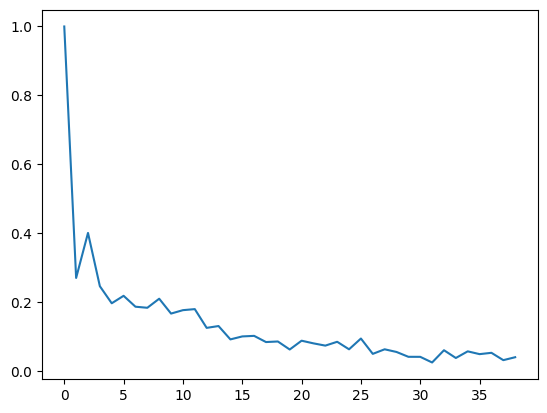

In [ ]:
#Plot ACF & PACF for r**2
plt.plot(sm.tsa.acf(sectors_rets['Health']**2))

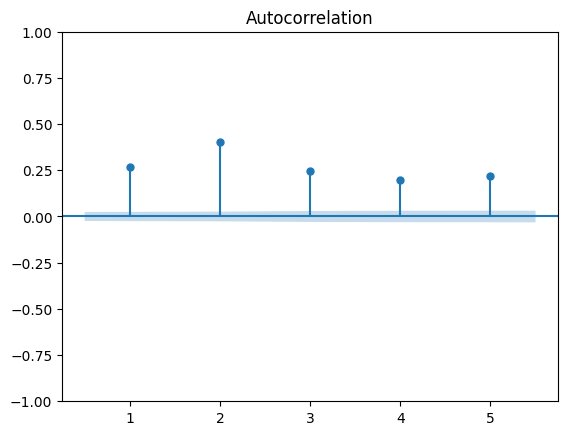

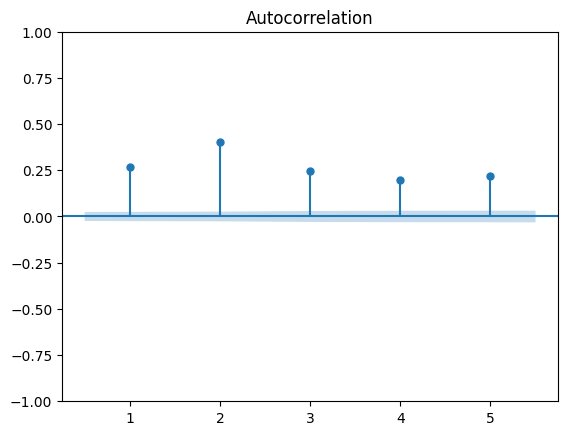

In [ ]:
tsaplots.plot_acf(sectors_rets['Health']**2, zero=False, lags=5)

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 12.7 MB/s eta 0:00:00


In [ ]:
#p=0, q=1
arimaModel = ARIMA(sectors_rets['Health'], order=[0,0,1])
res=arimaModel.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 Health   No. Observations:                 6377
Model:                 ARIMA(0, 0, 1)   Log Likelihood               19506.577
Date:                Wed, 26 Jun 2024   AIC                         -39007.153
Time:                        01:07:25   BIC                         -38986.872
Sample:                             0   HQIC                        -39000.132
                               - 6377                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.816      0.005       0.000       0.001
ma.L1         -0.0366      0.007     -5.514      0.000      -0.050      -0.024
sigma2         0.0001   1.02e-06    126.276      0.0

In [ ]:
sectors_rets.iloc[:,:].head()

,Health,Indus,Tech,Util,Energy
Date,,,,,
1998-12-23,0.022472,0.017449,0.023891,-0.004191,0.020820
1998-12-24,0.006105,0.013193,-0.003809,0.018412,-0.005263
1998-12-28,-0.014563,0.005208,0.002868,-0.005166,-0.005291
1998-12-29,0.022167,0.014248,0.002860,0.016615,0.009974
1998-12-30,-0.008434,-0.004470,-0.003802,-0.008172,-0.015142


In [ ]:
#Get last 500 days of data
sectors_rets_recent = sectors_rets.iloc[5877 : ,:]

<Axes: >

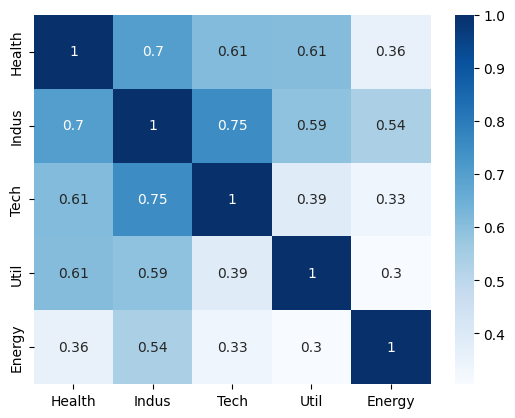

In [ ]:
sbs.heatmap(sectors_rets_recent.corr(), annot=True, cmap='Blues')

<Figure size 2000x500 with 0 Axes>

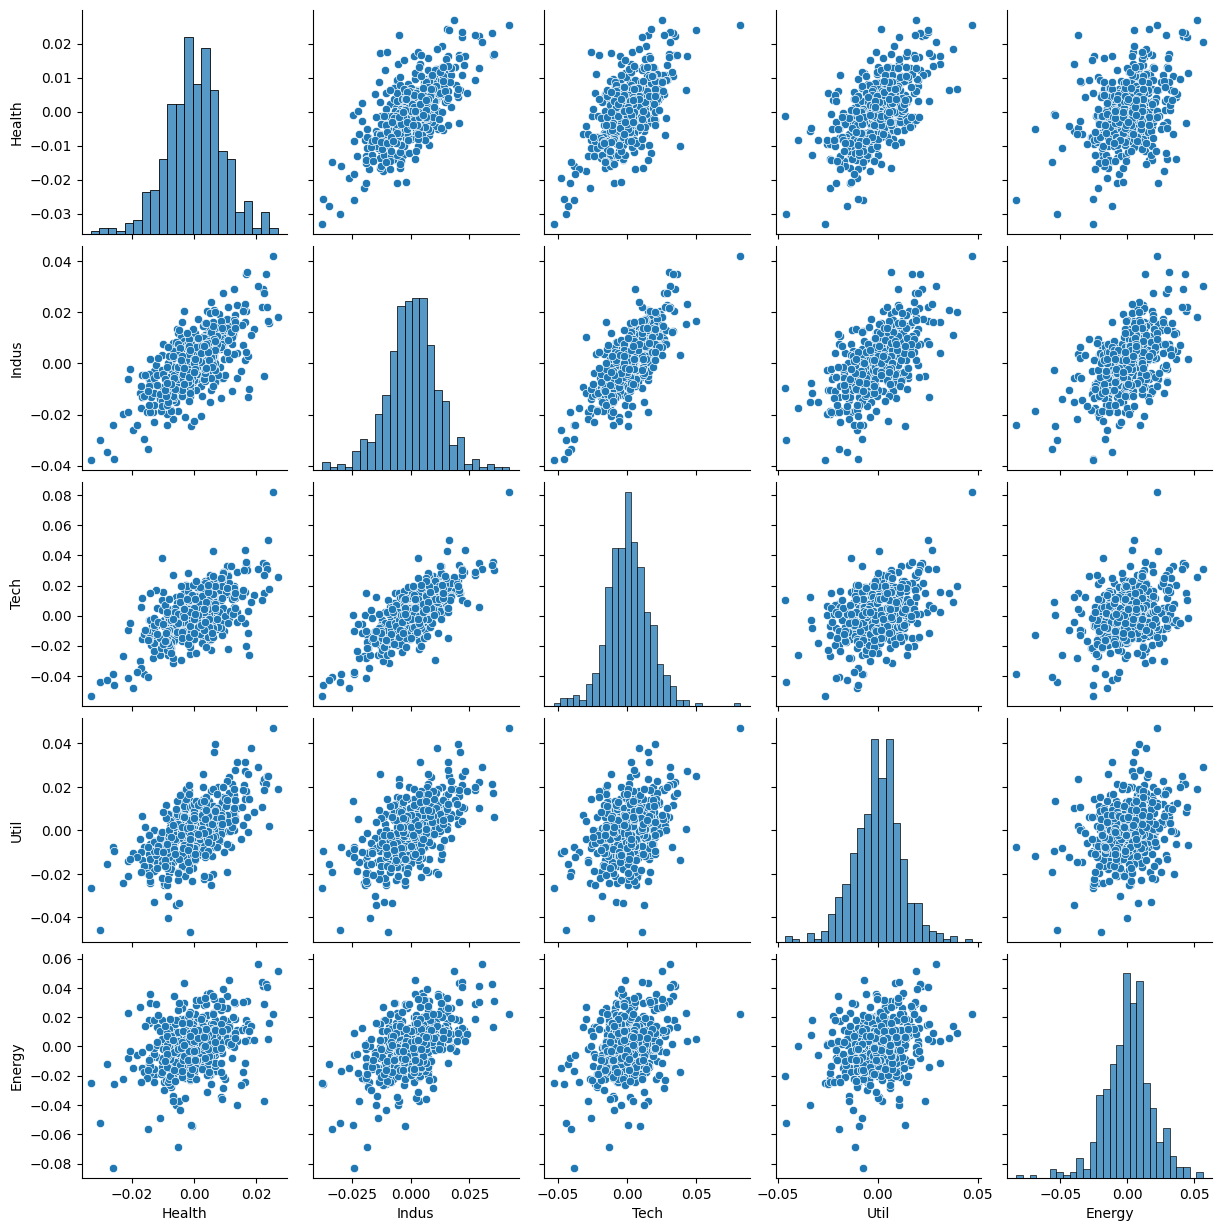

In [ ]:
plt.figure(figsize=(20,5))
sbs.pairplot(sectors_rets.iloc[5877 : ,:])
plt.show()

In [ ]:
#Generate simulations of sectors returns based on correlation

from scipy.stats import distributions
from scipy.stats import random_correlation

In [ ]:
binomD=distributions.binom(n=100, p=0.5)

In [ ]:
testX=np.arange(0, 100)

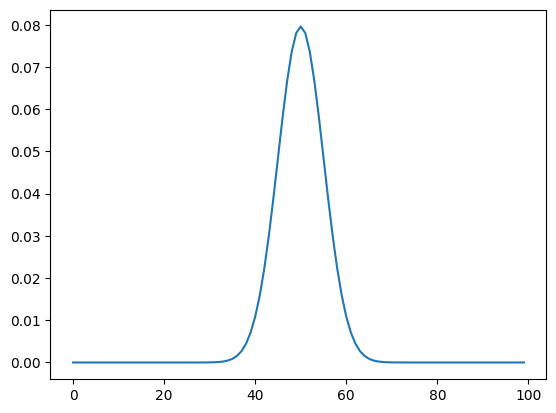

In [ ]:
plt.plot(binomD.pmf(testX))

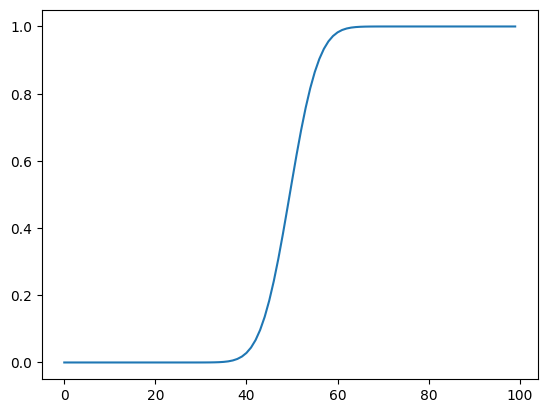

In [ ]:
plt.plot(binomD.cdf(testX))

In [ ]:
np.random.seed(1)

In [ ]:
randomZ = np.random.randn(5,1000)

In [ ]:
pd.DataFrame(randomZ).T.describe()


,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.050438,-0.016178,-0.006793,0.023511,0.026130
std,0.991911,0.984997,1.000923,1.043066,0.951389
min,-3.260615,-2.925305,-3.294858,-3.219132,-3.656440
25%,-0.715030,-0.675494,-0.665392,-0.680226,-0.614787
50%,-0.073058,-0.019891,0.039442,0.003457,0.010768
75%,0.603722,0.616179,0.633535,0.742909,0.672600
max,3.132030,3.404302,4.026849,3.613277,3.560873


In [ ]:
randomZ = randomZ.reshape(1000,5)

In [ ]:
randomZ.size

5000

In [ ]:
sectors_corr=sectors_rets_recent.corr().to_numpy()

In [ ]:
sectors_corr

array([[1.        , 0.70271246, 0.61298231, 0.60665407, 0.35841974],
       [0.70271246, 1.        , 0.7505728 , 0.59107065, 0.53658117],
       [0.61298231, 0.7505728 , 1.        , 0.38936399, 0.33476505],
       [0.60665407, 0.59107065, 0.38936399, 1.        , 0.30417922],
       [0.35841974, 0.53658117, 0.33476505, 0.30417922, 1.        ]])

In [ ]:
np.matmul(sectors_corr, randomZ)

array([[ 1.28628265,  0.58593209, -0.06672593, ..., -2.90313211,
         1.73883531, -3.77578221],
       [ 1.78895162,  0.56155446,  0.23874071, ..., -3.18077622,
         1.81019888, -3.0216    ],
       [ 1.40210887,  0.93529559,  0.09428693, ..., -3.14560692,
         1.14317342, -2.25761651],
       [ 1.27138696,  0.24729898, -0.06960414, ..., -1.59927384,
         1.76733171, -2.74998679],
       [ 1.09035205,  0.19220416,  0.97957033, ..., -2.07739423,
         1.60737594, -1.7617377 ]])

In [ ]:
np.dot(sectors_corr, randomZ)

array([[ 1.28628265,  0.58593209, -0.06672593, ..., -2.90313211,
         1.73883531, -3.77578221],
       [ 1.78895162,  0.56155446,  0.23874071, ..., -3.18077622,
         1.81019888, -3.0216    ],
       [ 1.40210887,  0.93529559,  0.09428693, ..., -3.14560692,
         1.14317342, -2.25761651],
       [ 1.27138696,  0.24729898, -0.06960414, ..., -1.59927384,
         1.76733171, -2.74998679],
       [ 1.09035205,  0.19220416,  0.97957033, ..., -2.07739423,
         1.60737594, -1.7617377 ]])

In [ ]:
chol=np.linalg.cholesky(sectors_corr)

In [ ]:
sectors_sim=chol@randomZ

In [ ]:
sectors_sim=pd.DataFrame(sectors_sim)

In [ ]:
sectors_sim.shape

(5, 1000)

In [ ]:
sectors_sim.T.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.021218,0.031219,0.020513,0.001619,0.049676
std,0.990838,0.991582,0.994290,0.981584,1.009330
min,-3.282079,-3.051828,-2.834100,-2.654409,-3.231249
25%,-0.638946,-0.604525,-0.677823,-0.635447,-0.628091
50%,0.056857,0.048742,0.056296,0.001833,0.067898
75%,0.727051,0.688672,0.694404,0.673372,0.738639
max,3.560613,2.916257,3.667389,2.874563,3.395242


In [ ]:
sectors_sim.T.corr()

,0,1,2,3,4
0,1.000000,0.684647,0.612420,0.572495,0.353209
1,0.684647,1.000000,0.751316,0.573858,0.532143
2,0.612420,0.751316,1.000000,0.373468,0.329307
3,0.572495,0.573858,0.373468,1.000000,0.299717
4,0.353209,0.532143,0.329307,0.299717,1.000000


In [ ]:
sectors_corr

array([[1.        , 0.70271246, 0.61298231, 0.60665407, 0.35841974],
       [0.70271246, 1.        , 0.7505728 , 0.59107065, 0.53658117],
       [0.61298231, 0.7505728 , 1.        , 0.38936399, 0.33476505],
       [0.60665407, 0.59107065, 0.38936399, 1.        , 0.30417922],
       [0.35841974, 0.53658117, 0.33476505, 0.30417922, 1.        ]])

In [ ]:
sectors_sim2= sectors_sim.T

In [ ]:
sectors_sim2.shape

(1000, 5)